### Define utils

In [1]:
import numpy as np
import netCDF4 as nc
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from cmcrameri import cm

In [2]:
from proteus.config import read_config
from proteus.utils.plot import observer_bands

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
# %matplotlib inline
# %config InlineBackend.figure_format='retina'

%matplotlib widget

### Do analysis

In [5]:
folder ="../output/hd63433d_v1/"

ncases = len(glob.glob(folder + "case_*"))
print(ncases, "cases found")

cases = []
for i in range(ncases):
    f = folder + "case_%05d/"%i
    cases.append(read_postproc(f))

16 cases found


## Plot emission over time

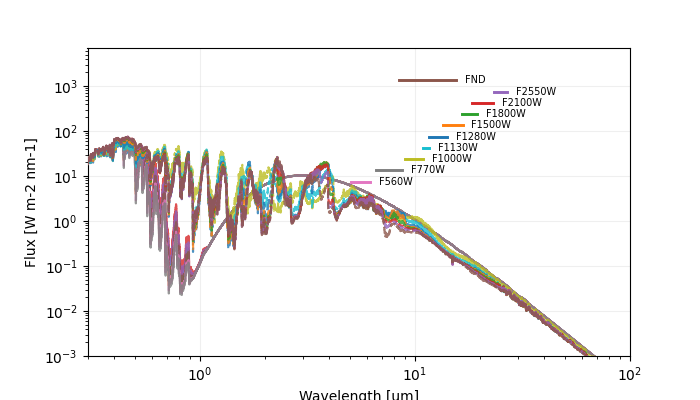

In [7]:
fig,ax = plt.subplots(1,1, figsize=(7,4))

# plot properties
al = 0.8
instrument = "MIRI"

ymax = 1.0
for i in range(ncases):
    c = cases[i]

    x = (c["bandmax"] + c["bandmin"]) * 0.5 * 1e6
    w = np.abs(c["bandmax"] - c["bandmin"]) * 1e9
    y = (c["ba_U_LW"][-1] + c["ba_U_SW"][-1])/w
    ymax = max(ymax, np.amax(y[2:]))


    ls = 'solid'
    if c["original_model"] == "AGNI":
        ls = 'dashed'

    ax.step(x,y, zorder=i, alpha=al, where='mid', label=str(i), ls=ls)

# observers
bands = observer_bands[instrument]
band_yspacing = 2.5
for i,b in enumerate(bands.keys()):
    v = bands[b]

    y = ymax * (10**(band_yspacing*i/len(bands.keys()) - 1))
    ax.plot(v, [y,y], lw=2.1, zorder=99)
    ax.text(v[1]*1.1, y, b, fontsize=7, color='k', zorder=99,
            rotation=-0, horizontalalignment='left', verticalalignment='center')

# decorate
ax.grid(zorder=-2, alpha=0.2)
ax.set_xlabel("Wavelength [um]")
ax.set_xscale("log")
ax.set_xlim(left=0.3, right=100)
ax.set_yscale("log")
ax.set_ylabel("Flux [W m-2 nm-1]")
ax.set_ylim(bottom = 1e-3)

plt.show()